# Machine Learning

## Data Observation

In [5]:
import pandas as pd
import numpy as np
train_data = pd.read_csv("train.csv")


C:\Users\user\AppData\Local\Temp\ipykernel_21740\1326576892.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
print(train_data.shape)
train_data.head()
train_data.describe()

(891, 12)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_data[train_data["Survived"] == 1]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


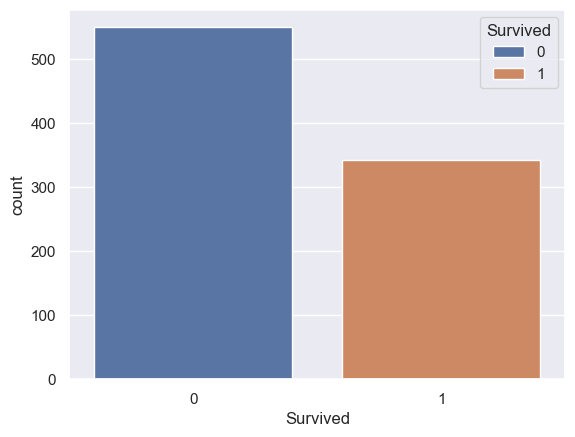

In [8]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Survived", hue="Survived", data=train_data) 

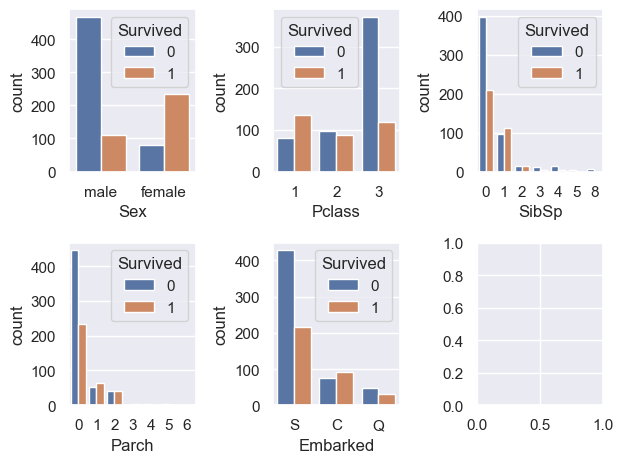

In [9]:
import matplotlib.pyplot as plt
# Visualize the count of survivors for columns 'sex','pclass','sibsp','parch','embarked'
cols = ['Sex','Pclass','SibSp','Parch','Embarked']

n_rows = 2
n_cols = 3

fig, ax = plt.subplots(2,3)

for r in range(n_rows):
    for c in range(n_cols):
        i = n_cols*r + c
        if i < 5:
            sns.countplot(x=cols[i], hue="Survived", data = train_data, ax = ax[r,c])
        
plt.tight_layout()
plt.show()

In [10]:
train_data.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [11]:
train_data.pivot_table("Survived", index="Sex", columns="Pclass")

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [12]:
age = pd.cut(train_data["Age"], [0, 18, 80])
train_data.pivot_table("Survived", ['Sex', age, "Pclass"], "Embarked")

C:\Users\user\AppData\Local\Temp\ipykernel_21740\796209302.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  train_data.pivot_table("Survived", ['Sex', age, "Pclass"], "Embarked")


Embarked                       C         Q         S
Sex    Age      Pclass                              
female (0, 18]  1       1.000000       NaN  0.857143
                2       1.000000       NaN  1.000000
                3       0.692308  0.750000  0.384615
       (18, 80] 1       0.970588  1.000000  0.972973
                2       1.000000  1.000000  0.890909
                3       0.666667  0.333333  0.420000
male   (0, 18]  1       0.500000       NaN  1.000000
                2       1.000000       NaN  0.571429
                3       0.400000  0.000000  0.214286
       (18, 80] 1       0.441176  0.000000  0.344262
                2       0.000000  0.000000  0.078947
                3       0.250000  0.100000  0.122093

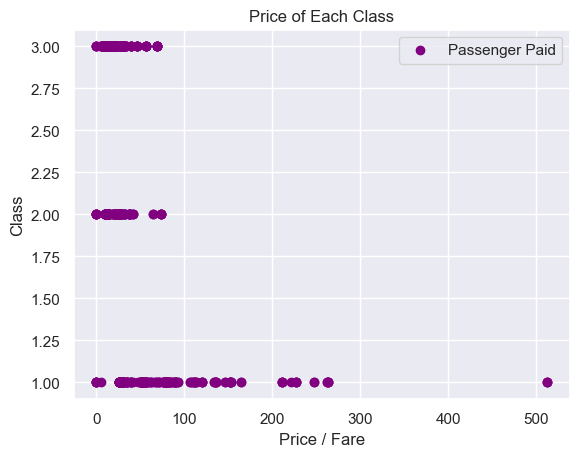

In [13]:
plt.scatter(train_data['Fare'],train_data['Pclass'], color = 'purple', label = 'Passenger Paid')
plt.ylabel('Class')
plt.xlabel('Price / Fare')
plt.title('Price of Each Class')
plt.legend()
plt.show()

---

## Feature Engineering

### 補值和去掉不重要的特徵

In [14]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df = train_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis = 1)
print(df["Age"].median())
df["Age"].fillna(value=df["Age"].median(), inplace=True)
df.isna().sum()

28.0


C:\Users\user\AppData\Local\Temp\ipykernel_21740\1344387825.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(value=df["Age"].median(), inplace=True)


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [16]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [17]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

### 將資料轉成numerical

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
onehotencoder = OneHotEncoder()

onehot = onehotencoder.fit_transform(df[['Sex']]).toarray()

In [19]:
df["Embarked"] = labelencoder.fit_transform(df["Embarked"])
df["Sex"] = labelencoder.fit_transform(df["Sex"])

In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


### feature scaling

In [21]:
from sklearn.preprocessing import StandardScaler
for col in df.columns:
    if col != "Survived":
        df[col] = StandardScaler().fit_transform(df[[col]])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...,...
886,0,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114
887,1,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114
888,0,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114
889,1,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460


---

## Feature Selection


### Basic filter method (Variance)

In [22]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
x = df
for col in df.columns:
    x[col] = selector.fit_transform(df[[col]])
x

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...,...
886,0,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114
887,1,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114
888,0,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114
889,1,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460


### Correlation filter method

In [23]:
corr_matrix = x.corr()
corr_feature = set()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.157112
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.014205
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,0.066654
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,0.038322
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,-0.221226
Embarked,-0.163517,0.157112,0.104057,-0.014205,0.066654,0.038322,-0.221226,1.000000


In [24]:
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            print("HI")
            col_name = corr_matrix.columns[i]
            corr_feature.add(col_name)
x.drop(corr_feature, axis = 1 ,inplace= True)
x


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114
1,1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460
2,1,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114
3,1,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114
4,0,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...,...
886,0,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114
887,1,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114
888,0,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114
889,1,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460


### Embedded Methods

#### L1

In [25]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV

y = x["Survived"]
tmp_x = x.drop("Survived", axis = 1)
reg = LassoCV()
reg.fit(x,y)
coef = pd.Series(reg.coef_, index = x.columns)
coef

Survived    0.998848
Pclass     -0.000000
Sex        -0.000040
Age        -0.000000
SibSp      -0.000000
Parch       0.000000
Fare        0.000000
Embarked   -0.000000
dtype: float64

#### L2

In [26]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV()
ridgecv.fit(tmp_x, y)
coef = pd.Series(ridgecv.coef_, index = tmp_x.columns)
coef

Pclass     -0.139532
Sex        -0.239887
Age        -0.073338
SibSp      -0.045136
Parch      -0.012798
Fare        0.015769
Embarked   -0.026395
dtype: float64

#### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(tmp_x, y)
importance = pd.Series(rf.feature_importances_, index = tmp_x.columns)
importance

Pclass      0.080122
Sex         0.252660
Age         0.261023
SibSp       0.050906
Parch       0.039097
Fare        0.280335
Embarked    0.035857
dtype: float64

#### RFECV

In [28]:
tmp_x = df.drop("Survived", axis = 1)
tmp_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.581114
1,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.938460
2,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.581114
3,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.581114
4,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.581114
...,...,...,...,...,...,...,...
886,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671,0.581114
887,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381,0.581114
888,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263,0.581114
889,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381,-1.938460


In [29]:
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier()
rfe = RFECV(estimator=rf)
rfe.fit(tmp_x, y)
rfe.get_feature_names_out()

array(['Pclass', 'Sex', 'Age', 'Fare'], dtype=object)

In [30]:
rfe.ranking_

array([1, 1, 1, 2, 3, 1, 4])

---

## Model Training

### RF

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
train, target = tmp_x.drop(["SibSp", "Parch", "Embarked"], axis = 1), x["Survived"]
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.1, random_state=42)
rf_model = RandomForestClassifier(n_estimators=250, random_state=42)
rf_model = rf_model.fit(x_train, y_train)
pred = rf_model.predict(x_test)
print(accuracy_score(pred, y_test))
print(f1_score(pred, y_test))
cross_val_score(rf_model, train, target, cv = 5)

0.8111111111111111
0.7792207792207793


array([0.79329609, 0.81460674, 0.85393258, 0.80898876, 0.83707865])

### XGBoost

In [32]:
from xgboost.sklearn import XGBRFClassifier
from xgboost.sklearn import XGBRFRegressor
xg_model = XGBRFClassifier()

cross_val_score(xg_model, train, target, cv = 5)

array([0.82681564, 0.8258427 , 0.85393258, 0.80337079, 0.84269663])

### LightGBM

In [247]:
import lightgbm as lgb

model = lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(x_train,y_train, eval_set=[(x_test,y_test),(x_train,y_train)], eval_metric='logloss')

print('Training accuracy {:.4f}'.format(model.score(x_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(x_test,y_test)))
cross_val_score(model, train, target, cv = 5)

[LightGBM] [Info] Number of positive: 306, number of negative: 495
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000064 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

[LightGBM] [Info] Number of positive: 274, number of negative: 439
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000067 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 187
[LightGBM] [Info] Number of data points in the train set: 713, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384292 -> initscore=-0.471371
[LightGBM] [Info] Start training from score -0.471371
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

array([0.80446927, 0.80898876, 0.85955056, 0.79775281, 0.84269663])

### Hyperpapameter selection
#### Bayesian Optimization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from bayes_opt import BayesianOptimization, UtilityFunction
import warnings
warnings.filterwarnings("ignore")

# Prepare the data.
cancer = load_breast_cancer()
X = cancer["data"]
y = cancer["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                            stratify = y,
                                        random_state = 42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Define the black box function to optimize.
def black_box_function(C):
    # C: SVC hyper parameter to optimize for.
    model = SVC(C = C)
    model.fit(X_train_scaled, y_train)
    y_score = model.decision_function(X_test_scaled)
    f = roc_auc_score(y_test, y_score)
    return f
# Set range of C to optimize for.
# bayes_opt requires this to be a dictionary.
pbounds = {"C": [0.1, 10]}
# Create a BayesianOptimization optimizer,
# and optimize the given black_box_function.
optimizer = BayesianOptimization(f = black_box_function,
                                 pbounds = pbounds, verbose = 2,
                                 random_state = 4)
optimizer.maximize(init_points = 5, n_iter = 10)
print("Best result: {}; f(x) = {}.".format(optimizer.max["params"], optimizer.max["target"]))

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.9979    | 9.674     |
| 2         | 0.9975    | 5.518     |
| 3         | 0.9979    | 9.73      |
| 4         | 0.9979    | 7.177     |
| 5         | 0.9979    | 7.008     |
| 6         | 0.9914    | 0.1023    |
| 7         | 0.9981    | 8.506     |
| 8         | 0.9981    | 8.15      |
| 9         | 0.9981    | 8.327     |
| 10        | 0.9981    | 8.8       |
| 11        | 0.9981    | 8.671     |
| 12        | 0.9981    | 7.974     |
| 13        | 0.9979    | 6.273     |
| 14        | 0.9981    | 8.064     |
| 15        | 0.9981    | 8.911     |
Best result: {'C': 8.50571739015795}; f(x) = 0.9981132075471698.
